# Projet Data Science - Analyse de la consommation énergétique à Tétouan

Ce notebook présente l'analyse complète réalisée sur les données de consommation énergétique de la ville de Tétouan (Maroc), incluant l'analyse descriptive, la PCA, la régression linéaire simple et multiple, ainsi qu'une prédiction finale.

## 1. Chargement des données

In [ ]:
import pandas as pd
import numpy as np

# Charger les données
df = pd.read_csv('Tetouan-PC.csv')
df.head()

## 2. Analyse descriptive

In [42]:
# Statistiques de base
df.describe()

,Temperature,Humidity,WindSpeed,GenDiffFlows,DiffFlows,PCZone1,PCZone2,PCZone3
count,13248.000000,13248.000000,13248.000000,13248.000000,13248.000000,13248.000000,13248.000000,13248.000000
mean,25.353431,63.239117,4.000284,254.436238,68.161448,35272.400777,22976.430993,23544.040816
std,3.687087,18.150509,1.857605,310.646997,91.721217,7073.784592,5239.586748,7667.598488
min,13.990000,11.340000,0.050000,0.018000,0.019000,18283.684790,10624.116420,8189.908069
25%,22.750000,50.260000,4.904000,0.088000,0.122000,29432.896780,18866.737060,17001.338912
50%,25.140000,65.050000,4.910000,61.540000,35.030000,35604.955750,22900.105600,23051.926500
75%,27.430000,78.300000,4.919000,526.100000,100.200000,40238.628617,27002.361105,28540.920500
max,40.010000,93.800000,4.998000,978.000000,558.700000,52204.395120,37408.860760,47598.326360


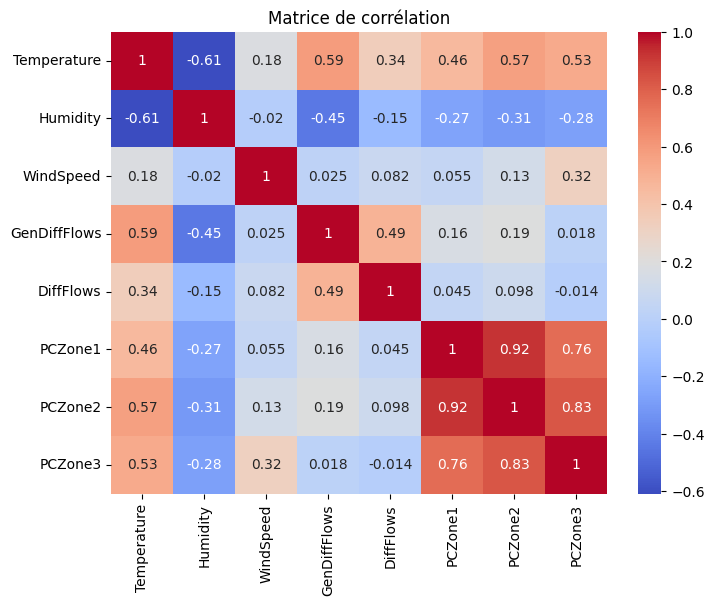

In [53]:
# Matrice de corrélation
import seaborn as sns
import matplotlib.pyplot as plt
# Convert 'DateTime' to datetime objects and set as index

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

## 3. Analyse en Composantes Principales (PCA)

In [44]:
# Sfrom sklearn.preprocessing import StandardScaler

features = ['Temperature', 'Humidity', 'WindSpeed', 'PCZone1', 'PCZone2', 'PCZone3']
X = df[features]

# Standardisation
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
print(f"Variance expliquée : {pca.explained_variance_ratio_}")



Variance expliquée : [0.55489045 0.17926885]


## 4. Régression linéaire simple

In [45]:
from sklearn.linear_model import LinearRegression

X_simple = df[['PCZone2']]
y = df['PCZone1']

model_simple = LinearRegression()
model_simple.fit(X_simple, y)

print(f"R² : {model_simple.score(X_simple, y)}")

R² : 0.8525029916006438


## 5. Régression linéaire multiple

In [46]:
X_multi = df[['Temperature', 'Humidity', 'WindSpeed', 'PCZone2', 'PCZone3']]
model_multi = LinearRegression()
model_multi.fit(X_multi, y)

print(f"R² ajusté : {model_multi.score(X_multi, y)}")

R² ajusté : 0.8640085392492175


## 6. Prédiction finale

In [47]:
# 5 variables pour prédire PCZone1
sample = pd.DataFrame([[26, 65, 4.2, 18840, 25700]], columns=[
    'Temperature', 'Humidity', 'WindSpeed', 'PCZone2', 'PCZone3'
])

prediction = model_multi.predict(sample)
print(f"Consommation prédite pour la Zone 1 : {prediction[0]:.0f} KW")


Consommation prédite pour la Zone 1 : 29802 KW


## 7. Conclusion

Ce notebook résume l'ensemble des traitements réalisés pour comprendre et prédire la consommation énergétique à Tétouan.